In [1]:
import numpy as np
from numpy import random as rdom

In [2]:
def random_net(N,p):
    network=np.array([])
    for i in range(N):
        line=np.append(np.zeros(i+1),rdom.choice([1,0],size=(N-(i+1)),p=[p,1-p]))
        network=np.append(network,line)
    network=network.reshape((N,N))
    network=network + np.transpose(network)
    return network

In [3]:
import graphviz

def connectivity(network,direction=False):
    
    if network.sum()==0:
        print("There is no connection.")
        
    connection=np.transpose(np.where(network==1))
    if direction:
        graph=graphviz.dot.Digraph(comment='Connectivity')
        
        for xdx,ydx in connection: # edge 설정
            graph.edge(str(xdx),str(ydx))
    else:
        graph=graphviz.dot.Graph(comment='Connectivity')
        connection=np.transpose(np.where(network==1)).tolist()

        for idx in range(network.shape[0]):
            graph.node(str(idx))
        
        for xdx,ydx in connection: #양방향성 제거.
            connection.remove([ydx,xdx])
            
        for xdx,ydx in connection:
            graph.edge(str(xdx),str(ydx))
    
    return graph

In [4]:
def kcore_net(network,k):
    now_net=network.copy()
    old_net=np.zeros(network.size)
    while not np.all(old_net.ravel() ==now_net.ravel()):
        old_net=now_net.copy()
        degree=now_net.sum(axis=0)
        where=np.where(degree < k)
        now_net[where]=0
        now_net[:,where]=0
    return now_net

In [5]:
def node_percolation(network,q):
    
    net=network.copy()
    
    #Node number
    N_node=net.shape[0]
    
    #removed node selection
    sel_node=np.where(rdom.choice([0,1],N_node,p=[1-q,q])) #1: remove 0: do not.
    
    #remove the nodes
    net[sel_node]=0
    net[:,sel_node]=0
    
    return net

In [93]:
network=random_net(10,0.2) #Adjacent matrix
network.shape

(10, 10)

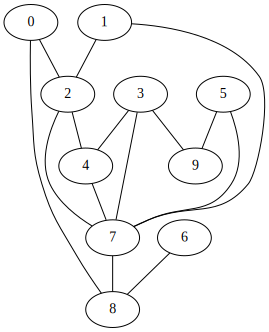

In [94]:
connectivity(network)

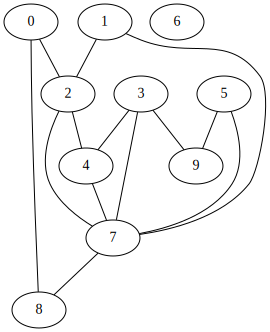

In [96]:
kcore=kcore_net(network,2)
connectivity(kcore)

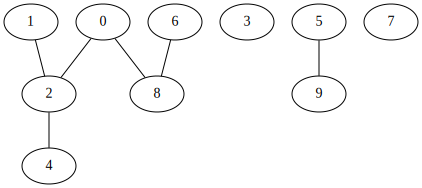

In [98]:
per_net=node_percolation(network,0.2)
connectivity(per_net)

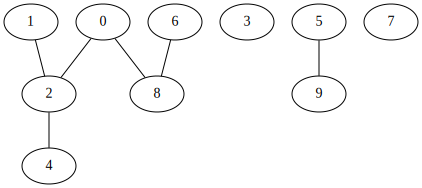

In [100]:
connectivity(kcore_net(per_net,1))

In [148]:
N=5000 #total node
avg_k=10 #average degree
p=avg_k/(N-1) #network_probability
dq=0.01
T=1
kcore_=[3,4,5,6,7]

ER_net=random_net(N,p)
Mc=[]
q_=np.arange(0,1,dq)

for k in kcore_:
    print('-',k,'- core')
    for q in q_:
        node_count=0
        for idx in range(T):
            percol=node_percolation(ER_net,q)
            k_net=kcore_net(percol,k)
            node_count += ((k_net.sum(axis=0) >0).sum())*1
        Mc.append(node_count/(N*T))

Mc=np.array(Mc).reshape(len(kcore_),int(1/dq))

- 3 - core
- 4 - core
- 5 - core
- 6 - core
- 7 - core


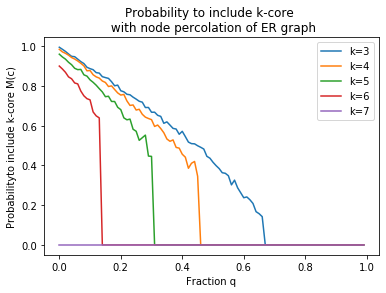

In [154]:
import matplotlib.pyplot as plt

for idx,k in enumerate(kcore_):
    plt.plot(q_,Mc[idx],label='k='+str(k))
plt.title("Probability to include k-core \n with node percolation of ER graph")
plt.xlabel("Fraction q")
plt.ylabel("Probabilityto include k-core M(c)")
plt.legend()
plt.show()

In [6]:
N=10000 #total node
avg_k=10 #average degree
p=avg_k/(N-1) #network_probability
dq=0.01
T=10
kcore_=[3,4,5,6,7]

ER_net=random_net(N,p)
Mc, z =[], []
q_=np.arange(0,1,dq)

for k in kcore_:
    print('-',k,'- core')
    for q in q_:
        node_count=0
        edge_count=0
        for idx in range(T):
            percol=node_percolation(ER_net,q)
            k_net=kcore_net(percol,k)
            node_count += ((k_net.sum(axis=0) >0).sum())*1
            edge_count += (k_net.sum()/2)
        Mc.append(node_count/(N*T))
        z.append(edge_count/(N*T))

z=np.array(z).reshape(len(kcore_),int(1/dq))
Mc=np.array(Mc).reshape(len(kcore_),int(1/dq))

- 3 - core
- 4 - core
- 5 - core
- 6 - core
- 7 - core


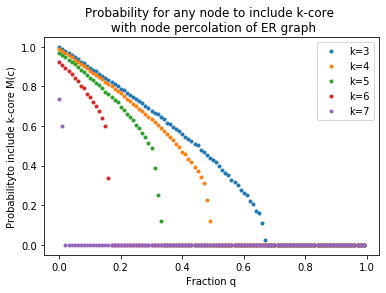

In [7]:
import matplotlib.pyplot as plt

for idx,k in enumerate(kcore_):
    plt.plot(q_,Mc[idx],'.',label='k='+str(k))
plt.title("Probability for any node to include k-core \n with node percolation of ER graph")
plt.xlabel("Fraction q")
plt.ylabel("Probabilityto include k-core M(c)")
plt.legend()
plt.show()

In [21]:
N=5000 #total node
avg_k=10 #average degree
p=avg_k/(N-1) #network_probability
dq=0.01
T=1
kcore_=np.arange(1,10,1)

ER_net=random_net(N,p)
Mc=[]
q_=np.arange(0,1,dq)

for k in kcore_:
    print('-',k,'- core')
    for q in q_:
        node_count=0
        for idx in range(T):
            percol=node_percolation(ER_net,q)
            k_net=kcore_net(percol,k)
            node_count += ((k_net.sum(axis=0) >0).sum())*1
        Mc.append(node_count/(N*T))

Mc=np.array(Mc).reshape(len(kcore_),int(1/dq))

- 1 - core
- 2 - core
- 3 - core
- 4 - core
- 5 - core
- 6 - core
- 7 - core
- 8 - core
- 9 - core


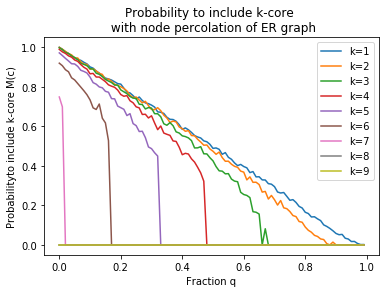

In [22]:
import matplotlib.pyplot as plt

for idx,k in enumerate(kcore_):
    plt.plot(q_,Mc[idx],label='k='+str(k))
plt.title("Probability to include k-core \n with node percolation of ER graph")
plt.xlabel("Fraction q")
plt.ylabel("Probabilityto include k-core M(c)")
plt.legend()
plt.show()

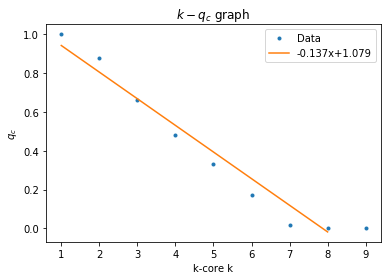

In [40]:
import scipy.optimize as opt

def lin(x,a,b):
    return a*x+b


qc=[]
for Mk in Mc:
    idx=np.where(Mk==0)[0]
    if len(idx)==0:
        qc.append(1)
    else:
        qc.append(q_[idx[0]])
        
x=np.linspace(1,8,100)

        
plt.figure(r"$k-q_{c}$ graph")
plt.title(r"$k-q_{c}$ graph")
plt.ylabel(r"$q_{c}$")
plt.xlabel(r"k-core k")
plt.plot(kcore_,qc,'.',label='Data')

popt,pcov = opt.curve_fit(lin,kcore_,qc)
plt.plot(x,lin(x,*popt),label=str(round(popt[0],3))+'x+'+str(round(popt[1],3)))
plt.legend()

### For directional ER Graph

In [6]:
def drandom_net(N,p):
    network = rdom.choice([1,0],size=(N,N),p=[p,1-p])
    np.fill_diagonal(network,0)
    return network

def dkcore_net(network,k):
    now_net=network.copy()
    old_net=np.zeros(network.size)
    while not np.all(old_net.ravel() ==now_net.ravel()):
        old_net=now_net.copy()
        degree=now_net.sum(axis=0)+now_net.sum(axis=1)
        where=np.where(degree < k)
        
        now_net[where]=0
        now_net[:,where]=0
    return now_net

In [42]:
N=5000 #total node
avg_k=10 #average degree
p=avg_k/(N-1) #network_probability
dq=0.01
T=1
kcore_=np.arange(1,17,1)

ER_net=drandom_net(N,p)
Mc, z =[], []
q_=np.arange(0,1,dq)

for k in kcore_:
    print('-',k,'- core')
    for q in q_:
        node_count=0
        edge_count=0
        for idx in range(T):
            percol=node_percolation(ER_net,q)
            k_net=dkcore_net(percol,k)
            node_count += ((k_net.sum(axis=0) >0).sum())*1
            edge_count += (k_net.sum()/2)
        Mc.append(node_count/(N*T))
        z.append(edge_count/(N*T))

z=np.array(z).reshape(len(kcore_),int(1/dq))
Mc=np.array(Mc).reshape(len(kcore_),int(1/dq))

- 1 - core
- 2 - core
- 3 - core
- 4 - core
- 5 - core
- 6 - core
- 7 - core
- 8 - core
- 9 - core
- 10 - core
- 11 - core
- 12 - core
- 13 - core
- 14 - core
- 15 - core
- 16 - core


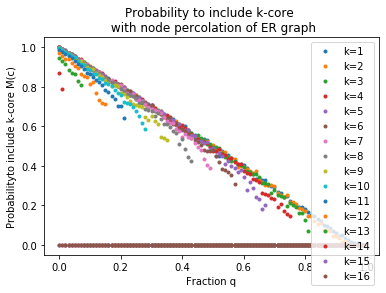

In [43]:
import matplotlib.pyplot as plt

for idx,k in enumerate(kcore_):
    plt.plot(q_,Mc[idx],'.',label='k='+str(k))
plt.title("Probability to include k-core \n with node percolation of ER graph")
plt.xlabel("Fraction q")
plt.ylabel("Probabilityto include k-core M(c)")
plt.legend()
plt.show()

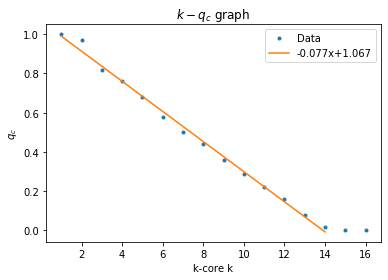

In [48]:
import scipy.optimize as opt

def lin(x,a,b):
    return a*x+b


qc=[]
for Mk in Mc:
    idx=np.where(Mk==0)[0]
    if len(idx)==0:
        qc.append(1)
    else:
        qc.append(q_[idx[0]])
        
x=np.linspace(1,14,100)

        
plt.figure(r"$k-q_{c}$ graph")
plt.title(r"$k-q_{c}$ graph")
plt.ylabel(r"$q_{c}$")
plt.xlabel(r"k-core k")
plt.plot(kcore_,qc,'.',label='Data')

popt,pcov = opt.curve_fit(lin,kcore_[:14],qc[:14])
plt.plot(x,lin(x,*popt),label=str(round(popt[0],3))+'x+'+str(round(popt[1],3)))
plt.legend()

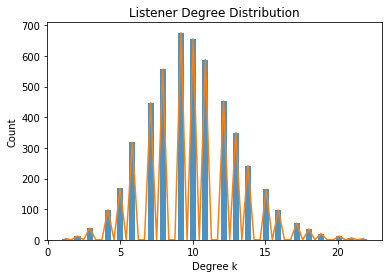

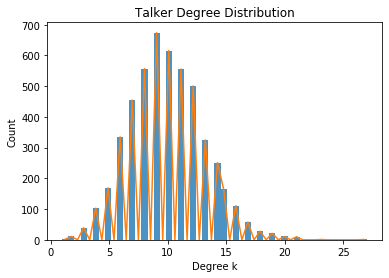

In [50]:
net=ER_net


def idx2pos(name_dic,pos):
    count=0
    pre_pos=0
    for nam in name_dic:
        count += 1*(pre_pos<= pos <=name_dic[nam])
        pre_pos=pos
        if count == 1:
            return nam


k_listener=net.sum(axis=0)
plt.figure("Listener Degree Distribution")
plt.title("Listener Degree Distribution")
listener_hist=plt.hist(k_listener,bins=50,alpha=0.8)
plt.xlabel('Degree k')
plt.ylabel('Count')
x=(listener_hist[1][:-1]+listener_hist[1][1:])/2
plt.plot(x,listener_hist[0])


k_talker=net.sum(axis=1)
plt.figure("Talker Degree Distribution")
plt.title("Talker Degree Distribution")
talker_hist=plt.hist(k_talker,bins=50,alpha=0.8)
plt.xlabel('Degree k')
plt.ylabel('Count')
x=(talker_hist[1][:-1]+talker_hist[1][1:])/2
plt.plot(x,talker_hist[0])